In [1]:
import patsy
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format

In [2]:
state_names = [
    "Alabama", "Alaska", "Arizona", "Arkansas", 
    "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", 
    "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", 
    "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", 
    "Montana", "Nebraska", "Nevada", "New Hampshire",
    "New Jersey", "New Mexico", "New York",
    "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania",
    "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington",
    "West Virginia", "Wisconsin", "Wyoming"]

state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

def keep_state(string):
    if string in state_mapping:
        string = state_mapping[string]
    return string in state_names

def clear_nan(inp):
    if np.isnan(inp):
        return 0
    else:
        return int(inp)

In [3]:
renamer = {
    'Age1': 'Group',
    'Year1': 'Year',
    'Number of People At Possible Risk for Psychotic-Like Episodes': 'Psychotic Episodes',
    'Number of People Identifying as Trauma Survivors': 'Trauma Survivors',
    'Number of People Reporting Frequent Suicidal Ideation': 'Suicidal Ideation',
    'Number of People Scoring Positive for PTSD': 'PTSD',
    'Number of People Scoring with Severe Depression': 'Severe Depression'
}

to_keep = ['State', 'Group', 'Year',
           'Psychotic Episodes', 'Trauma Survivors',
           'Suicidal Ideation', 'PTSD',
           'Severe Depression', 'Total Population']

mh2020 = pd.read_csv('data/full_mh_2020.csv')
mh2020 = mh2020.rename(renamer, axis=1)
mh2020 = mh2020[(to_keep)]

mh2021 = pd.read_csv('data/full_mh_2021.csv')
mh2021 = mh2021.rename(renamer, axis=1)
mh2021 = mh2021[(to_keep)]

mh2022 = pd.read_csv('data/full_mh_2022.csv')
mh2022 = mh2022.rename(renamer, axis=1)
mh2022 = mh2022[(to_keep)]

mh2023 = pd.read_csv('data/full_mh_2023.csv')
mh2023 = mh2023.rename(renamer, axis=1)
mh2023 = mh2023[(to_keep)]

combined_20_23 = pd.concat([mh2020, mh2021], axis=0)
combined_20_23 = pd.concat([combined_20_23, mh2022], axis=0)
combined_20_23 = pd.concat([combined_20_23, mh2023], axis=0)

dfs = []
for year in ['2020', '2021', '2022', '2023']:
    for age in ['adults', 'youth']:
        filename = 'data/subgroups/mh_' + year + '_' + age + '_all.csv'
        df_year_age = pd.read_csv(filename)
        dfs.append(df_year_age)
        #print(str(year) + ' ' + str(age) + ': ' + str(df_year_age.shape[0]))

for df in dfs:
    df = df.rename(renamer, axis=1)
    df = df[(to_keep)]
    combined_20_23 = pd.concat([combined_20_23, df], axis=0)

combined_20_23 = combined_20_23[combined_20_23['State'] != 'District of Columbia']
#combined_20_23 = combined_20_23.reset_index().drop(columns=['index'])
#combined_melted = pd.melt(combined_20_23, id_vars=['State', 'Year', 'Group', 'Total Population'], value_vars=['Psychotic Episodes', 'Trauma Survivors', 'Suicidal Ideation', 'PTSD', 'Severe Depression'], var_name='Issue', value_name='# at Risk per 100K', ignore_index=False)
#pd.concat([combined_20_23[['State', 'Group', 'Year', 'Total Population']],
#          combined_melted.pivot(columns='Issue', values='# at Risk per 100K')], axis=1)
#combined_melted
combined_20_23

,State,Group,Year,Psychotic Episodes,Trauma Survivors,Suicidal Ideation,PTSD,Severe Depression,Total Population
0,Alabama,All Ages,2020,29.088,53.235,45.338,13.730,41.945,5039877
1,Alaska,All Ages,2020,49.545,98.134,83.120,25.386,70.837,732673
2,Arizona,All Ages,2020,25.411,54.244,47.332,13.482,43.896,7276316
3,Arkansas,All Ages,2020,26.769,58.198,40.087,18.276,39.030,3025891
4,California,All Ages,2020,18.699,42.031,41.340,10.408,37.298,39237836
...,...,...,...,...,...,...,...,...,...
46,Virginia,Youth (Under 18),2023,31.657,109.271,99.523,20.247,78.847,1866910
47,Washington,Youth (Under 18),2023,39.658,137.073,115.573,23.260,89.944,1646573
48,West Virginia,Youth (Under 18),2023,42.339,128.438,90.645,25.006,77.858,351922
49,Wisconsin,Youth (Under 18),2023,33.397,128.610,98.344,21.355,79.799,1245629


In [4]:
df_2024=pd.read_csv('https://www.aclu.org/wp-json/api/legislation/csv/74348')

df_2023=pd.read_csv('https://www.aclu.org/wp-json/api/legislation/csv/67497')
df_2022=pd.read_csv('https://www.aclu.org/wp-content/uploads/2024/01/legislation-tracker_2022.csv')
df_2021 = pd.read_csv('https://www.aclu.org/wp-content/uploads/2024/01/2021-legislation-tracker_2021.csv')
df_2020 = pd.read_csv('https://www.aclu.org/wp-content/uploads/2024/01/legislation-tracker_2020.csv')

aff_comp_protection = pd.read_csv(r'wrangling work/aff_compprotection', sep = '\t', header = None)
aff_health_care = pd.read_csv(r'wrangling work/aff_health_care', sep = '\t', header = None)
aff_ID_docs = pd.read_csv(r'wrangling work/aff_ID_docs', sep = '\t', header = None)
aff_incomplete_protection = pd.read_csv(r'wrangling work/aff_incomplete_2018', sep = '\t', header = None)
aff_other = pd.read_csv(r'wrangling work/aff_other', sep = '\t', header = None)

anti_adoption = pd.read_csv(r'wrangling work/anti_adoption', sep = '\t', header = None)


anti_FADA_and_religious_exemption=  pd.read_csv(r'wrangling work/anti_FADA_and_religious_exemption', sep = '\t', header = None)
anti_first_amend_def =  pd.read_csv(r'wrangling work/anti_first_amend_def', sep = '\t', header = None)

anti_health_care = pd.read_csv(r'wrangling work/anti_health_care', sep = '\t', header = None)

anti_marriage_rel_exemption =  pd.read_csv(r'wrangling work/anti_marriage_rel_exemption', sep = '\t', header = None)

anti_preempt_local_protection =  pd.read_csv(r'wrangling work/anti_preempt_local_protection', sep = '\t', header = None)

anti_religious_exemption_RFRA =  pd.read_csv(r'wrangling work/anti_religious_exemption_RFRA', sep = '\t', header = None)

anti_school_and_student_org =  pd.read_csv(r'wrangling work/anti_school_and_student_org', sep = '\t', header = None)

anti_single_sex_restrooms = pd.read_csv(r'wrangling work/anti_single_sex_restrooms', sep = '\t', header = None)

other_anti_lgbt = pd.read_csv(r'wrangling work/other_anti_lgbt', sep = '\t', header = None)

other_anti_trans =  pd.read_csv(r'wrangling work/other_anti_trans', sep = '\t', header = None)

other_rel_exemption = pd.read_csv(r'wrangling work/other_rel_exemption', sep = '\t', header = None)
#reading csv from text files that have pre 2020 data

def make_df(tdf, which_type):
    ind = 0
    state=[]
    number = []
    status = []
    for each in tdf[0]:
        if ind % 3 == 0:
            state.append(each)
        elif ind % 3 == 1:
            number.append(each)
        else:
            status.append(each)
        ind += 1
    
    new_df = pd.DataFrame()

    new_df['State'] = state
    new_df['number'] = number
    new_df['status'] = status

    
    dates = []
    statuses = []
    for status in new_df['status']:
        parts = status.split(': ')
        if len(parts) > 1:
            dates.append(parts[0])
            statuses.append(': '.join(parts[1:]))
        else:
            dates.append('')
            statuses.append(parts[0])

    new_df['Date'] = dates
    new_df['status'] = statuses
    new_df = new_df.assign(dtype = which_type)
    
    new_df = new_df.drop(0)

    return new_df
df_list = [aff_comp_protection, aff_health_care, aff_ID_docs, aff_incomplete_protection, aff_other, anti_adoption, 
            anti_FADA_and_religious_exemption, anti_first_amend_def, anti_health_care, anti_marriage_rel_exemption,
            anti_preempt_local_protection, anti_religious_exemption_RFRA, anti_school_and_student_org,
            anti_single_sex_restrooms, other_anti_lgbt, other_anti_trans, other_rel_exemption]
df_names = ['aff_comp_protection', 'aff_health_care', 'aff_ID_docs', 'aff_incomplete_protection', 'aff_other', 'anti_adoption', 
            'anti_FADA_and_religious_exemption', 'anti_first_amend_def', 'anti_health_care', 'anti_marriage_rel_exemption',
            'anti_preempt_local_protection', 'anti_religious_exemption_RFRA', 'anti_school_and_student_org',
            'anti_single_sex_restrooms', 'other_anti_lgbt', 'other_anti_trans', 'other_rel_exemption']
for each, name in zip(df_list, df_names):
    
    try:
        each = make_df(each, name)
        
    except:
        print(name)
        
#identifies which ones are messed up 

dfs = {}

# Loop through each element in the list
for each, name in zip(df_list, df_names):
    # Generate DataFrame for the current element
    new_df = make_df(each, name)
    
    # Store the DataFrame in the dictionary with element as key
    dfs[name] = new_df
    
combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df = combined_df[combined_df['State'] != 'State'] #remove invalid rows
#this is the combined df of all the ones we had to pull from text data. Further cleaning will involve combining all
status_index = df_2022.columns.get_loc('Status ')

# Insert the 'Status Detail' column right after the 'Status' column
df_2022.insert(status_index + 1, 'Status Detail', np.nan)

df_2020 = df_2020.reset_index()
df_2020.columns = df_2020.iloc[0]
df_2020 = df_2020.drop(df_2020.index[0])
df_2020['Year'] = 2020
df_2021['Year'] = 2021
df_2022['Year'] = 2022
df_2023['Year'] = 2023
df_2024['Year'] = 2024


website_csv= [df_2024, df_2022, df_2023, df_2021, df_2020]
for each in website_csv:
    each.columns = each.columns.str.strip()


combined_web = pd.concat(website_csv)
combined_web = combined_web.dropna(thresh=2)
#since we gave all of them a default 'year' value, this deletes rows where this default column is the only data
combined_web = combined_web.reset_index()

combined_web = combined_web.drop(index = [1457, 1456])
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}
combined_web['State'] = combined_web['State'].str.strip()
combined_web['State'] = combined_web['State'].replace(state_mapping)
combined_web['State'] = combined_web['State'].replace('New England', 'Nebraska')
#whoever made this csv initially confused them for some reason? ig NE looks like new england
combined_web = combined_web[~combined_web.apply(lambda row: row.astype(str).str.contains('Data is current').any(), axis=1)]
anti_web_df =  combined_web[~combined_web['Issues'].astype(str).str.contains('LGBTQ Equality Bills')]
anti_web_df =  anti_web_df[~anti_web_df['Issues'].astype(str).str.contains('good bills')]
#anti_web_df['Status Date'] = pd.to_datetime(anti_web_df['Status Date'])

excluding_duplicates = anti_web_df.groupby('State')["Bill Name"].nunique()
excluding_duplicates = excluding_duplicates.reset_index()
#makes a df of the number of unique bills per state, so that there aren't repeats 

merged_df = pd.merge(combined_20_23, excluding_duplicates[['State', 'Bill Name']], on='State', how='left')
merged_df = merged_df.rename(columns = {'Bill Name': 'Number of bills'})

bills_2020 = anti_web_df[anti_web_df['Year'] == 2020]
bills_2021 = anti_web_df[anti_web_df['Year'] == 2021]
bills_2022 = anti_web_df[anti_web_df['Year'] == 2022]
bills_2023 = anti_web_df[anti_web_df['Year'] == 2023]
bills_2024 = anti_web_df[anti_web_df['Year'] == 2024]
count_state_2020 = bills_2020.groupby('State')['Bill Name'].nunique().reset_index()
count_state_2021 = bills_2021.groupby('State')['Bill Name'].nunique().reset_index()
count_state_2022 = bills_2022.groupby('State')['Bill Name'].nunique().reset_index()
count_state_2023 = bills_2023.groupby('State')['Bill Name'].nunique().reset_index()
count_state_2024 = bills_2024.groupby('State')['Bill Name'].nunique().reset_index()
merged_20 = pd.merge(mh2020, count_state_2020[['State', 'Bill Name']], on='State', how='left')
merged_21 = pd.merge(mh2021, count_state_2021[['State', 'Bill Name']], on='State', how='left')
merged_22 = pd.merge(mh2022, count_state_2022[['State', 'Bill Name']], on='State', how='left')
merged_23 = pd.merge(mh2023, count_state_2023[['State', 'Bill Name']], on='State', how='left')

merged_list = [merged_20, merged_21, merged_22, merged_23]
for df in merged_list:
    df.fillna(0, inplace=True)
    df.rename(columns={'Bill Name': 'Number', 'Severe Depression': 'Severe_Depression', 'Psychotic Episodes':'Psychotic_ep',
                       'Trauma Survivors': 'Trauma', 'Suicidal Ideation' :'Suicidal_Ideation'}, inplace=True)
'''merged_20 = merged_20[merged_20['State'] != 'Alaska']
merged_21 = merged_21[merged_21['State'] != 'Alaska']
merged_22 = merged_22[merged_22['State'] != 'Alaska']
merged_23 = merged_23[merged_23['State'] != 'Alaska']'''

count_state_2020

,State,Bill Name
0,Alabama,4
1,Alaska,1
2,Arizona,4
3,Colorado,3
4,Florida,2
5,Georgia,3
6,Idaho,3
7,Illinois,1
8,Indiana,4
9,Iowa,7


In [5]:
filler = pd.DataFrame(state_names).assign(Count = 0).rename({0: 'State'}, axis=1)

In [6]:
laws_20 = count_state_2020
laws_20 = laws_20.rename({'Bill Name': 'Bills'}, axis=1)
laws_20_full = filler.merge(laws_20, on='State', how='left')
laws_20_full['Count'] = laws_20_full['Count'] + laws_20_full['Bills']
laws_20_full['Count'] = laws_20_full['Count'].apply(clear_nan)
laws_20_full = laws_20_full.drop(columns=['Bills'])
laws_20_full['Year'] = 2020
laws_20_full = laws_20_full[['State', 'Year', 'Count']]
laws_20_full

,State,Year,Count
0,Alabama,2020,4
1,Alaska,2020,1
2,Arizona,2020,4
3,Arkansas,2020,0
4,California,2020,0
5,Colorado,2020,3
6,Connecticut,2020,0
7,Delaware,2020,0
8,Florida,2020,2
9,Georgia,2020,3


In [7]:
laws_21 = count_state_2021
laws_21 = laws_21.rename({'Bill Name': 'Bills'}, axis=1)
laws_21['Bills'] = laws_21['Bills'].apply(int)
laws_21_full = filler.merge(laws_21, on='State', how='left')
laws_21_full['Count'] = laws_21_full['Count'] + laws_21_full['Bills']
laws_21_full['Count'] = laws_21_full['Count'].apply(clear_nan)
laws_21_full = laws_21_full.drop(columns=['Bills'])
#np.count_nonzero(laws_21_full['Count'])
laws_21_full['Year'] = 2021
laws_21_full = laws_21_full[['State', 'Year', 'Count']]
laws_21_full

,State,Year,Count
0,Alabama,2021,4
1,Alaska,2021,0
2,Arizona,2021,4
3,Arkansas,2021,12
4,California,2021,0
5,Colorado,2021,0
6,Connecticut,2021,2
7,Delaware,2021,0
8,Florida,2021,4
9,Georgia,2021,4


In [8]:
laws_22 = count_state_2022
laws_22 = laws_22.rename({'Bill Name': 'Bills'}, axis=1)
laws_22['Bills'] = laws_22['Bills'].apply(int)
laws_22_full = filler.merge(laws_22, on='State', how='left')
laws_22_full['Count'] = laws_22_full['Count'] + laws_22_full['Bills']
laws_22_full['Count'] = laws_22_full['Count'].apply(clear_nan)
laws_22_full = laws_22_full.drop(columns=['Bills'])
#np.count_nonzero(laws_22_full['Count'])
laws_22_full['Year'] = 2022
laws_22_full = laws_22_full[['State', 'Year', 'Count']]
laws_22_full

,State,Year,Count
0,Alabama,2022,6
1,Alaska,2022,3
2,Arizona,2022,12
3,Arkansas,2022,0
4,California,2022,1
5,Colorado,2022,0
6,Connecticut,2022,0
7,Delaware,2022,2
8,Florida,2022,6
9,Georgia,2022,6


In [9]:
laws_23 = count_state_2023
laws_23 = laws_23.rename({'Bill Name': 'Bills'}, axis=1)
laws_23['Bills'] = laws_23['Bills'].apply(int)
laws_23_full = filler.merge(laws_23, on='State', how='left')
laws_23_full['Count'] = laws_23_full['Count'] + laws_23_full['Bills']
laws_23_full['Count'] = laws_23_full['Count'].apply(clear_nan)
laws_23_full = laws_23_full.drop(columns=['Bills'])
#np.count_nonzero(laws_23_full['Count'])
laws_23_full['Year'] = 2023
laws_23_full = laws_23_full[['State', 'Year', 'Count']]
laws_23_full

,State,Year,Count
0,Alabama,2023,6
1,Alaska,2023,5
2,Arizona,2023,11
3,Arkansas,2023,9
4,California,2023,1
5,Colorado,2023,1
6,Connecticut,2023,2
7,Delaware,2023,0
8,Florida,2023,10
9,Georgia,2023,5


In [10]:
laws_full_all = [laws_20_full, laws_21_full, laws_22_full, laws_23_full]
law_count_df = pd.concat(laws_full_all, axis=0)
mh_laws = combined_20_23[combined_20_23['State'].apply(keep_state)].merge(law_count_df, on=['State', 'Year'], how='left')
mh_laws#[(mh_laws['Year'] == 2023) & (mh_laws['State'] == 'Missouri')]

,State,Group,Year,Psychotic Episodes,Trauma Survivors,Suicidal Ideation,PTSD,Severe Depression,Total Population,Count
0,Alabama,All Ages,2020,29.088,53.235,45.338,13.730,41.945,5039877,4
1,Alaska,All Ages,2020,49.545,98.134,83.120,25.386,70.837,732673,1
2,Arizona,All Ages,2020,25.411,54.244,47.332,13.482,43.896,7276316,4
3,Arkansas,All Ages,2020,26.769,58.198,40.087,18.276,39.030,3025891,0
4,California,All Ages,2020,18.699,42.031,41.340,10.408,37.298,39237836,0
...,...,...,...,...,...,...,...,...,...,...
595,Virginia,Youth (Under 18),2023,31.657,109.271,99.523,20.247,78.847,1866910,12
596,Washington,Youth (Under 18),2023,39.658,137.073,115.573,23.260,89.944,1646573,2
597,West Virginia,Youth (Under 18),2023,42.339,128.438,90.645,25.006,77.858,351922,12
598,Wisconsin,Youth (Under 18),2023,33.397,128.610,98.344,21.355,79.799,1245629,15


# FACILITY DATA 2020

In [11]:
import pandas as pd

#import csv 
facilities_df = pd.read_csv('mental_health_facilities.csv')

#keep relevant columns
keep_cols = ['LST', 'FACILITYTYPE', 'FOCUS', 'SRVC62', 'PAYASST', 'REVCHK1']
facilities_df = facilities_df[keep_cols]
facilities_df = facilities_df.rename(columns={'LST': 'State', 'FACILITYTYPE': 'Facility Type', 'FOCUS': 'Focus', 'PAYASST': 'Pay Assist', 'SRVC62': 'LGBTQ Treatment Program', 'REVCHK1': 'Accepts Cash Payment' })

facility_type_mapping = {
    1: 'Psychiatric hospital',
    2: 'Separate inpatient unit',
    3: 'Residential treatment center for children',
    4: 'Residential treatment center for adults',
    5: 'Other type of residential treatment facility',
    6: 'Veterans Administration Medical Center',
    7: 'Community Mental Health Center',
    8: 'Certified Community Behaviorial Health Clinic',
    9: 'Partial hospitalization/day treatment facility',
    10: 'Outpatient mental health facility',
    11: 'Multi-setting mental health facility',
    12: 'Other'
}

# Apply the mapping to the 'facility type' column
facilities_df['Facility Type'] = facilities_df['Facility Type'].map(facility_type_mapping)


focus_mapping = {
    1: 'Mental health treatment',
    3: 'Mental health and substance use treatment',
    4: 'General heath care',
    5: 'Other service focus'

}

# Apply the mapping to the 'focus' column
facilities_df['Focus'] = facilities_df['Focus'].map(focus_mapping)

#Drop any facilities that are have state code 'ZZ' because this means that the location is unknown
facilities_df = facilities_df[~(facilities_df['State'] == 'ZZ')]
facilities_df['State'] = facilities_df['State'].replace(state_mapping)
facilities_df = facilities_df.rename({'LGBTQ Treatment Program': 'ProgLGBT'}, axis=1)
facilities_df = pd.concat([facilities_df.groupby('State').count()[['Facility Type']], facilities_df.groupby('State').sum()[['ProgLGBT']]], axis=1)
facilities_df = pd.concat([facilities_df, pd.DataFrame(combined_20_23.groupby('State').mean(numeric_only = True)['Total Population'])], axis=1)
facilities_df = facilities_df.dropna(axis=0)
facilities_df = facilities_df.rename({
    'Facility Type': 'CountFacility'
}, axis=1)
facilities_df['CountFacility'] = facilities_df['CountFacility'] / facilities_df['Total Population'] * 100000
facilities_df['ProgLGBT'] = facilities_df['ProgLGBT'] / facilities_df['Total Population'] * 100000
facilities_df = facilities_df.drop(columns='Total Population').reset_index()

In [12]:
mh_laws_20_all = mh_laws[(mh_laws['Year'] == 2020) & (mh_laws['Group'] == 'All Ages')]
mh_laws_21_all = mh_laws[(mh_laws['Year'] == 2021) & (mh_laws['Group'] == 'All Ages')]
mh_laws_22_all = mh_laws[(mh_laws['Year'] == 2022) & (mh_laws['Group'] == 'All Ages')]
mh_laws_23_all = mh_laws[(mh_laws['Year'] == 2023) & (mh_laws['Group'] == 'All Ages')]

mh_laws_20_youth = mh_laws[(mh_laws['Year'] == 2020) & (mh_laws['Group'] == 'Youth (Under 18)')]
mh_laws_21_youth = mh_laws[(mh_laws['Year'] == 2021) & (mh_laws['Group'] == 'Youth (Under 18)')]
mh_laws_22_youth = mh_laws[(mh_laws['Year'] == 2022) & (mh_laws['Group'] == 'Youth (Under 18)')]
mh_laws_23_youth = mh_laws[(mh_laws['Year'] == 2023) & (mh_laws['Group'] == 'Youth (Under 18)')]

mh_laws_20_adult = mh_laws[(mh_laws['Year'] == 2020) & (mh_laws['Group'] == 'Adults (Over 18)')]
mh_laws_21_adult = mh_laws[(mh_laws['Year'] == 2021) & (mh_laws['Group'] == 'Adults (Over 18)')]
mh_laws_22_adult = mh_laws[(mh_laws['Year'] == 2022) & (mh_laws['Group'] == 'Adults (Over 18)')]
mh_laws_23_adult = mh_laws[(mh_laws['Year'] == 2023) & (mh_laws['Group'] == 'Adults (Over 18)')]

mh_laws_20_all = mh_laws_20_all.merge(facilities_df, on='State', how='left')

mh_laws_20_youth = mh_laws_20_youth.merge(facilities_df, on='State', how='left')

mh_laws_20_adult = mh_laws_20_adult.merge(facilities_df, on='State', how='left')

mh_dfs = [
    mh_laws_20_all,
    mh_laws_20_youth,
    mh_laws_20_adult,
    mh_laws_21_all,
    mh_laws_21_youth,
    mh_laws_21_adult,
    mh_laws_22_all,
    mh_laws_22_youth,
    mh_laws_22_adult,
    mh_laws_23_all,
    mh_laws_23_youth,
    mh_laws_23_adult
]

for mh_df in mh_dfs:
    mh_df.rename({'Count': 'CountLaws'}, axis=1, inplace=True)
    mh_df.rename(columns = {'Bill Name': 'NumberBills',
                                       'Psychotic Episodes': 'Psychotic',
                                       'Trauma Survivors': 'Trauma',
                                       'Suicidal Ideation': 'SuicidalIdea',
                                       'Severe Depression': 'Depression'}, inplace=True)

/var/folders/4r/ljwlvg0x5pv9zsh8tkrhq7b40000gn/T/ipykernel_8215/985576115.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mh_df.rename({'Count': 'CountLaws'}, axis=1, inplace=True)
/var/folders/4r/ljwlvg0x5pv9zsh8tkrhq7b40000gn/T/ipykernel_8215/985576115.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mh_df.rename(columns = {'Bill Name': 'NumberBills',


In [30]:
mh_laws_20_all

,State,Group,Year,Psychotic,Trauma,SuicidalIdea,PTSD,Depression,Total Population,CountLaws,CountFacility,ProgLGBT
0,Alabama,All Ages,2020,29.088,53.235,45.338,13.730,41.945,5039877,4,4.627,0.504
1,Alaska,All Ages,2020,49.545,98.134,83.120,25.386,70.837,732673,1,18.210,4.706
2,Arizona,All Ages,2020,25.411,54.244,47.332,13.482,43.896,7276316,4,8.876,2.870
3,Arkansas,All Ages,2020,26.769,58.198,40.087,18.276,39.030,3025891,0,10.228,3.063
4,California,All Ages,2020,18.699,42.031,41.340,10.408,37.298,39237836,0,3.718,1.338
5,Colorado,All Ages,2020,24.724,59.927,44.253,15.296,39.538,5812069,3,4.866,1.442
6,Connecticut,All Ages,2020,18.804,44.237,34.807,11.399,31.978,3605597,0,9.168,4.024
7,Delaware,All Ages,2020,18.737,44.749,36.477,13.753,31.992,1003384,0,5.342,1.039
8,Florida,All Ages,2020,18.121,37.005,33.010,10.762,31.376,21781128,2,3.366,0.865
9,Georgia,All Ages,2020,20.853,42.344,39.492,11.019,36.613,10799566,3,3.109,1.022


In [42]:
mh_issues = mh_laws_20_all.columns[3:8]

reg_results = pd.DataFrame()
columns=['Intercept', 'CountLaws', 'CountFacility']

for group in [mh_laws_20_all, mh_laws_20_youth, mh_laws_20_adult]:
    for issue in list(mh_issues):
        arg = issue + ' ~ CountLaws + CountFacility'
        outcome, predictors = patsy.dmatrices(arg, group)
        mod = sm.OLS(outcome, predictors)  
        res = mod.fit()
        p_values = res.summary2().tables[1]['P>|t|']
        p_values.index = [0, 1, 2]
        p_values = pd.DataFrame(p_values).T
        p_values.index = [issue + ' P>|t|']
        params = pd.DataFrame(res.params).T
        params.index = [issue + ' Values']
        reg_results = pd.concat([reg_results, params])
        reg_results = pd.concat([reg_results, p_values])
reg_results.columns = columns
reg_results.reset_index().rename({'index': 'Category'}, axis=1)

results_all = reg_results.iloc[:10].T
results_youth = reg_results.iloc[10:20].T
results_adults = reg_results.iloc[20:].T
results_all

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,14.549,0.000,35.261,0.000,33.662,0.000,10.046,0.000,31.253,0.000
CountLaws,0.724,0.016,1.276,0.029,0.137,0.783,0.334,0.037,0.503,0.232
CountFacility,0.907,0.000,1.750,0.000,0.798,0.009,0.344,0.000,0.625,0.014


In [14]:
results_youth

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,25.023,0.000,43.467,0.000,79.444,0.000,12.708,0.000,64.461,0.000
CountLaws,0.116,0.792,0.602,0.402,-1.104,0.319,0.113,0.553,-0.569,0.515
CountFacility,1.157,0.000,1.714,0.000,1.420,0.033,0.233,0.041,1.041,0.047


In [43]:
results_adults

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,11.393,0.000,32.349,0.000,20.472,0.000,9.160,0.000,21.666,0.000
CountLaws,0.845,0.005,1.425,0.017,0.373,0.263,0.382,0.026,0.723,0.027
CountFacility,0.841,0.000,1.762,0.000,0.596,0.003,0.370,0.000,0.480,0.013


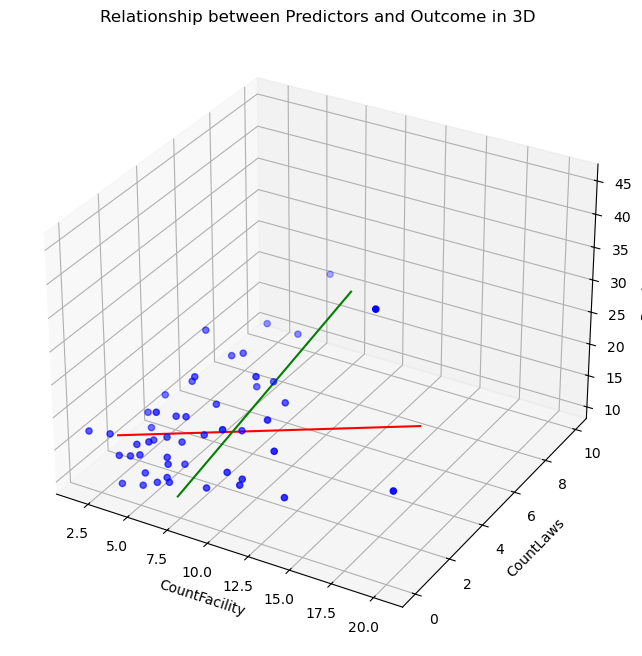

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mh_laws_20_adult['CountFacility'], mh_laws_20_adult['CountLaws'], mh_laws_20_adult['Psychotic'], c='blue', marker='o')

ax.set_xlabel('CountFacility')
ax.set_ylabel('CountLaws')
ax.set_zlabel('Psychotic')
# Plot lines for each predictor
x_line = np.linspace(mh_laws_20_adult['CountFacility'].min(), mh_laws_20_adult['CountFacility'].max(), 100)
y_line = np.linspace(mh_laws_20_adult['CountLaws'].min(), mh_laws_20_adult['CountLaws'].max(), 100)


slope_p1 = 0.841	
intercept_p1 = 11.393
z_line_p1 = slope_p1 * x_line + intercept_p1
ax.plot(x_line, np.full_like(x_line, mh_laws_20_adult['CountLaws'].mean()), z_line_p1, color='red', label='facility count Line')


slope_p2 = 0.845
intercept_p2 = 11.393
z_line_p2 = slope_p2 * y_line + intercept_p2
ax.plot(np.full_like(y_line, mh_laws_20_adult['CountFacility'].mean()), y_line, z_line_p2, color='green', label='number laws')



plt.title('Relationship between Predictors and Outcome in 3D')
plt.show()

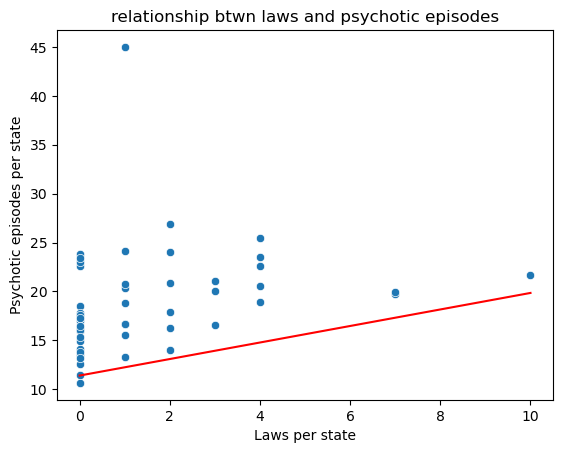

In [38]:
sns.scatterplot()
x = mh_laws_20_adult['CountLaws'] 
y = mh_laws_20_adult['Psychotic']

# Plot scatter plot
sns.scatterplot(x=x, y=y)


slope =  0.845

intercept = 11.393  

# Create line data
line_x = np.linspace(np.min(x), np.max(x), 100)
line_y = slope * line_x + intercept

# Plot the line
plt.plot(line_x, line_y, color='red')

plt.xlabel('Laws per state')
plt.ylabel('Psychotic episodes per state')
plt.title('relationship btwn laws and psychotic episodes')

plt.show()


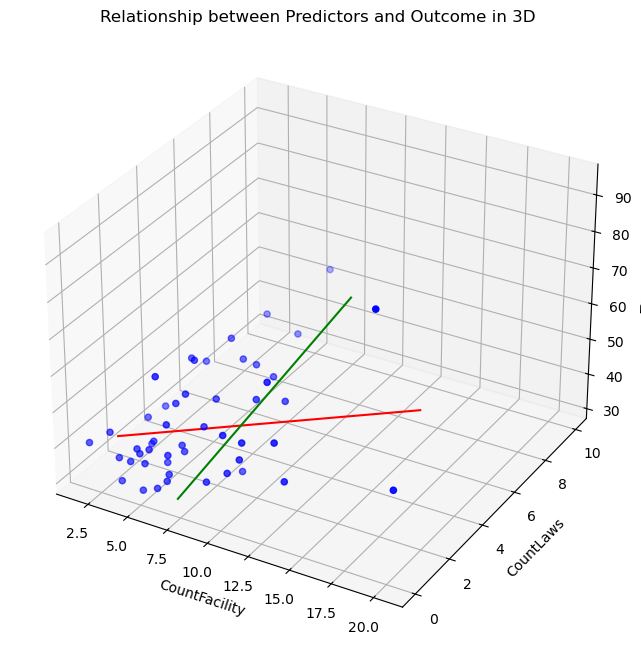

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mh_laws_20_adult['CountFacility'], mh_laws_20_adult['CountLaws'], mh_laws_20_adult['Trauma'], c='blue', marker='o')

ax.set_xlabel('CountFacility')
ax.set_ylabel('CountLaws')
ax.set_zlabel('Trauma')
# Plot lines for each predictor
x_line = np.linspace(mh_laws_20_adult['CountFacility'].min(), mh_laws_20_adult['CountFacility'].max(), 100)
y_line = np.linspace(mh_laws_20_adult['CountLaws'].min(), mh_laws_20_adult['CountLaws'].max(), 100)


slope_p1 = 1.762
intercept_p1 = 32.349	
z_line_p1 = slope_p1 * x_line + intercept_p1
ax.plot(x_line, np.full_like(x_line, mh_laws_20_adult['CountLaws'].mean()), z_line_p1, color='red', label='facility count Line')


slope_p2 = 1.425
intercept_p2 = 32.349		
z_line_p2 = slope_p2 * y_line + intercept_p2
ax.plot(np.full_like(y_line, mh_laws_20_adult['CountFacility'].mean()), y_line, z_line_p2, color='green', label='number laws')



plt.title('Relationship between Predictors and Outcome in 3D')
plt.show()

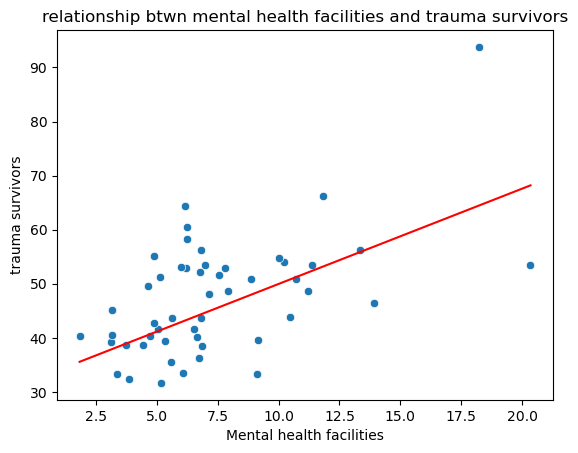

In [49]:
sns.scatterplot()
x = mh_laws_20_adult['CountFacility'] 
y = mh_laws_20_adult['Trauma']

# Plot scatter plot
sns.scatterplot(x=x, y=y)


slope = results_adults.loc['CountFacility', 'Trauma Values']

intercept = results_adults.loc['Intercept', 'Trauma Values']

# Create line data
line_x = np.linspace(np.min(x), np.max(x), 100)
line_y = slope * line_x + intercept

# Plot the line
plt.plot(line_x, line_y, color='red')

plt.xlabel('Mental health facilities')
plt.ylabel('trauma survivors')
plt.title('relationship btwn mental health facilities and trauma survivors')

plt.show()


In [ ]:
sns.scatterplot()
x = mh_laws_20_adult['CountFacility'] 
y = mh_laws_20_adult['Trauma']

# Plot scatter plot
sns.scatterplot(x=x, y=y)


slope = 

intercept = 32.349

# Create line data
line_x = np.linspace(np.min(x), np.max(x), 100)
line_y = slope * line_x + intercept

# Plot the line
plt.plot(line_x, line_y, color='red')

plt.xlabel('Laws per state')
plt.ylabel('trauma survivors')
plt.title('relationship btwn laws and trauma survivors')

plt.show()


In [16]:
poverty21 = pd.read_csv("data/poverty21.csv")
poverty22 = pd.read_csv("data/poverty22.csv")

poverty21['Label (Grouping)'] += " (2021)"
poverty22['Label (Grouping)'] += " (2022)"
# Combine the data from both years
combined_data = pd.concat([poverty21, poverty22])

# Extract state names from column names
state_names = [col.split('!!')[0] for col in combined_data.columns if '!!' in col]

# Rename columns with state names
new_column_names = {}
seen_states = set()
for col in combined_data.columns[::-1]:  # Reverse order to keep the last occurrence
    if '!!' in col:
        state_name = col.split('!!')[0]
        if state_name not in seen_states:
            seen_states.add(state_name)
            new_column_names[col] = state_name
        else:
            combined_data.drop(columns=[col], inplace=True)  # Remove entire column

combined_data.rename(columns=new_column_names, inplace=True)

# Save the cleaned data to a new CSV file
combined_data.to_csv("cleaned_poverty_data.csv", index=False)

# Extracting relevant columns (States and Age groups population)
age_data = combined_data.iloc[[2, 6, 10], 1:]

# Converting data to numeric, replacing commas, and setting data types
age_data = age_data.replace('%', '', regex=True).replace(',', '', regex=True).astype(float)

# Transpose the dataframe for easy plotting
age_data_transposed = age_data.transpose()
age_data_transposed = age_data_transposed.reset_index()
age_data_transposed = age_data_transposed[(age_data_transposed['index'] != 'Puerto Rico') & (age_data_transposed['index'] != 'District of Columbia')]
age_data_transposed = age_data_transposed.set_index('index')
age_data_transposed = age_data_transposed.rename({2: 'Youth (<18)', 6: 'Adults (18-65)', 10: 'Seniors (65+)'}, axis=1)
age_data_transposed = age_data_transposed.reset_index().rename({'index': 'State'}, axis=1)
age_data_transposed = age_data_transposed[age_data_transposed['State'].apply(keep_state)].iloc[1:]


# 2021 general population poverty rates
gen_pov = combined_data.T[0].iloc[1:]
gen_pov_21 = pd.DataFrame(gen_pov.iloc[:, 0].str.replace('%', '').apply(float)).reset_index().rename({'index': 'State', 0: 'Poverty'}, axis=1)
youth_pov_21 = age_data_transposed[['State', 'Youth (<18)']].rename({'Youth (<18)': 'Poverty'}, axis=1)
adult_pov_21 = age_data_transposed[['State', 'Adults (18-65)']].rename({'Adults (18-65)': 'Poverty'}, axis=1)
mh_laws_21_all = mh_laws_21_all.merge(gen_pov_21, on='State', how='left')
mh_laws_21_youth = mh_laws_21_youth.merge(youth_pov_21, on='State', how='left')
mh_laws_21_adult = mh_laws_21_adult.merge(adult_pov_21, on='State', how='left')

In [17]:
mh_issues = mh_laws_21_all.columns[3:8]

reg_results = pd.DataFrame()
columns=['Intercept', 'CountLaws', 'Poverty']

mh_dfs = [mh_laws_21_all, mh_laws_21_youth, mh_laws_21_adult]

for group in mh_dfs:
    for issue in list(mh_issues):
        arg = issue + ' ~ CountLaws + Poverty'
        outcome, predictors = patsy.dmatrices(arg, group)
        mod = sm.OLS(outcome, predictors)  
        res = mod.fit()
        p_values = res.summary2().tables[1]['P>|t|']
        p_values.index = [0, 1, 2]
        p_values = pd.DataFrame(p_values).T
        p_values.index = [issue + ' P>|t|']
        params = pd.DataFrame(res.params).T
        params.index = [issue + ' Values']
        reg_results = pd.concat([reg_results, params])
        reg_results = pd.concat([reg_results, p_values])
reg_results.columns = columns
reg_results.reset_index().rename({'index': 'Category'}, axis=1)

results_all = reg_results.iloc[:10].T
results_youth = reg_results.iloc[10:20].T
results_adults = reg_results.iloc[20:].T
results_all

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,31.600,0.000,102.999,0.000,56.506,0.000,26.193,0.000,50.170,0.000
CountLaws,0.325,0.340,0.572,0.496,-0.050,0.922,0.382,0.132,0.194,0.654
Poverty,-0.027,0.954,-1.485,0.208,-0.561,0.425,-0.182,0.602,-0.310,0.608


In [18]:
results_youth

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,53.175,0.000,134.687,0.000,116.012,0.000,31.147,0.000,99.618,0.000
CountLaws,-0.166,0.747,-0.082,0.944,-0.808,0.379,0.232,0.383,-0.424,0.582
Poverty,-0.334,0.445,-1.599,0.112,-0.940,0.230,-0.348,0.127,-0.992,0.133


In [19]:
results_adults

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,22.241,0.000,82.474,0.000,35.031,0.000,21.177,0.000,32.038,0.000
CountLaws,0.372,0.212,0.488,0.525,-0.010,0.979,0.361,0.155,0.228,0.514
Poverty,0.349,0.431,-0.462,0.687,-0.030,0.958,0.174,0.643,0.288,0.581


In [20]:
state_names = [col.split('!!')[0] for col in poverty22.columns if '!!' in col]

# Rename columns with state names
new_column_names = {}
seen_states = set()
for col in poverty22.columns[::-1]:  # Reverse order to keep the last occurrence
    if '!!' in col:
        state_name = col.split('!!')[0]
        if state_name not in seen_states:
            seen_states.add(state_name)
            new_column_names[col] = state_name
        else:
            poverty22.drop(columns=[col], inplace=True)  # Remove entire column

poverty22.rename(columns=new_column_names, inplace=True)

# Extracting relevant columns (States and Age groups population)
age_data = poverty22.iloc[[2, 6, 10], 1:]

# Converting data to numeric, replacing commas, and setting data types
age_data = age_data.replace('%', '', regex=True).replace(',', '', regex=True).astype(float)

# Transpose the dataframe for easy plotting
age_data_transposed = age_data.transpose()
age_data_transposed = age_data_transposed.reset_index()
age_data_transposed = age_data_transposed[(age_data_transposed['index'] != 'Puerto Rico') & (age_data_transposed['index'] != 'District of Columbia')]
age_data_transposed = age_data_transposed.set_index('index')
age_data_transposed = age_data_transposed.rename({2: 'Youth (<18)', 6: 'Adults (18-65)', 10: 'Seniors (65+)'}, axis=1)
age_data_transposed = age_data_transposed.reset_index().rename({'index': 'State'}, axis=1)
age_data_transposed = age_data_transposed[age_data_transposed['State'].apply(keep_state)].iloc[1:]

In [21]:
gen_pov_22 = pd.DataFrame(gen_pov.iloc[:, 1].str.replace('%', '').apply(float)).reset_index().rename({'index': 'State', 0: 'Poverty'}, axis=1)
youth_pov_22 = age_data_transposed[['State', 'Youth (<18)']].rename({'Youth (<18)': 'Poverty'}, axis=1)
adult_pov_22 = age_data_transposed[['State', 'Adults (18-65)']].rename({'Adults (18-65)': 'Poverty'}, axis=1)
mh_laws_22_all = mh_laws_22_all.merge(gen_pov_22, on='State', how='left')
mh_laws_22_youth = mh_laws_22_youth.merge(youth_pov_22, on='State', how='left')
mh_laws_22_adult = mh_laws_22_adult.merge(adult_pov_22, on='State', how='left')

In [22]:
mh_issues = mh_laws_22_all.columns[3:8]

reg_results = pd.DataFrame()
columns=['Intercept', 'CountLaws', 'Poverty']

mh_dfs = [mh_laws_22_all, mh_laws_22_youth, mh_laws_22_adult]

for group in mh_dfs:
    for issue in list(mh_issues):
        arg = issue + ' ~ CountLaws + Poverty'
        outcome, predictors = patsy.dmatrices(arg, group)
        mod = sm.OLS(outcome, predictors)  
        res = mod.fit()
        p_values = res.summary2().tables[1]['P>|t|']
        p_values.index = [0, 1, 2]
        p_values = pd.DataFrame(p_values).T
        p_values.index = [issue + ' P>|t|']
        params = pd.DataFrame(res.params).T
        params.index = [issue + ' Values']
        reg_results = pd.concat([reg_results, params])
        reg_results = pd.concat([reg_results, p_values])
reg_results.columns = columns
reg_results.reset_index().rename({'index': 'Category'}, axis=1)

results_all = reg_results.iloc[:10].T
results_youth = reg_results.iloc[10:20].T
results_adults = reg_results.iloc[20:].T
results_all

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,24.074,0.000,112.453,0.000,59.044,0.000,20.763,0.000,49.948,0.000
CountLaws,0.165,0.402,0.308,0.673,-0.101,0.742,0.140,0.476,0.035,0.897
Poverty,0.273,0.403,-0.847,0.484,-0.483,0.341,0.330,0.310,-0.031,0.946


In [23]:
results_youth

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,48.736,0.000,184.869,0.000,144.386,0.000,37.000,0.000,119.175,0.000
CountLaws,-0.025,0.929,-0.255,0.816,-0.744,0.259,0.063,0.783,-0.583,0.271
Poverty,-0.358,0.224,-2.560,0.027,-1.756,0.012,-0.527,0.030,-1.469,0.009


In [24]:
results_adults

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,15.704,0.000,83.998,0.000,33.043,0.000,14.292,0.001,29.120,0.000
CountLaws,0.188,0.288,0.367,0.585,0.068,0.759,0.142,0.473,0.195,0.401
Poverty,0.627,0.049,0.499,0.675,0.156,0.689,0.795,0.027,0.608,0.141


In [25]:
hc = pd.read_csv('data/HPSA Score Detail_Full Data_data.csv')

def get_year(string):
    components = string.split('/')
    return int(components[2])

hc['Last Update Date'] = hc['Last Update Date'].apply(get_year)
hc = hc[(hc['Last Update Date'] == 2023) | (hc['Last Update Date'] == 2022) | (hc['Last Update Date'] == 2021) | (hc['Last Update Date'] == 2020)]
hc = hc.sort_values(by=['State/Territory', 'Last Update Date'])
hc = hc.rename({
    'State/Territory': 'State',
    'Last Update Date': 'Year',
    'HPSA Score': 'HPSA'
}, axis=1).drop(columns=['State V1', 'Image'])
hc = hc[hc['Year'] == 2023]
hc = hc.drop(columns='Year')
hc = hc[['State', 'HPSA']].groupby(['State']).mean().reset_index()

mh_laws_23_all = mh_laws_23_all.merge(hc, on='State', how='left')
mh_laws_23_youth = mh_laws_23_youth.merge(hc, on='State', how='left')
mh_laws_23_adult = mh_laws_23_adult.merge(hc, on='State', how='left')

In [26]:
mh_dfs = [mh_laws_23_all, mh_laws_23_youth, mh_laws_23_adult]

mh_issues = mh_laws_22_all.columns[3:8]

reg_results = pd.DataFrame()
columns=['Intercept', 'CountLaws', 'HPSA']

for group in mh_dfs:
    for issue in list(mh_issues):
        arg = issue + ' ~ CountLaws + HPSA'
        outcome, predictors = patsy.dmatrices(arg, group)
        mod = sm.OLS(outcome, predictors)  
        res = mod.fit()
        p_values = res.summary2().tables[1]['P>|t|']
        p_values.index = [0, 1, 2]
        p_values = pd.DataFrame(p_values).T
        p_values.index = [issue + ' P>|t|']
        params = pd.DataFrame(res.params).T
        params.index = [issue + ' Values']
        reg_results = pd.concat([reg_results, params])
        reg_results = pd.concat([reg_results, p_values])
reg_results.columns = columns
reg_results.reset_index().rename({'index': 'Category'}, axis=1)

results_all = reg_results.iloc[:10].T
results_youth = reg_results.iloc[10:20].T
results_adults = reg_results.iloc[20:].T
results_all

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,21.241,0.000,94.727,0.000,50.278,0.000,17.952,0.000,43.166,0.000
CountLaws,0.069,0.192,0.147,0.553,-0.011,0.901,0.076,0.167,0.040,0.615
HPSA,-0.112,0.694,-0.450,0.738,-0.503,0.295,-0.087,0.768,-0.312,0.474


In [27]:
results_youth

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,41.721,0.000,149.948,0.000,132.099,0.000,26.538,0.000,103.406,0.000
CountLaws,-0.067,0.472,-0.160,0.643,-0.408,0.098,-0.039,0.583,-0.330,0.111
HPSA,-0.460,0.362,-1.806,0.336,-1.790,0.179,-0.297,0.443,-1.222,0.273


In [28]:
results_adults

,Psychotic Values,Psychotic P>|t|,Trauma Values,Trauma P>|t|,SuicidalIdea Values,SuicidalIdea P>|t|,PTSD Values,PTSD P>|t|,Depression Values,Depression P>|t|
Intercept,15.194,0.000,78.942,0.000,26.442,0.000,15.462,0.001,25.560,0.000
CountLaws,0.094,0.048,0.206,0.377,0.050,0.340,0.103,0.061,0.106,0.062
HPSA,0.013,0.959,-0.052,0.967,-0.057,0.840,-0.026,0.930,0.013,0.966


# -------------------------------------

# -----------------------------------

# IGNORE EVERYTHING PAST THIS!!!

In [29]:
# stop the kernel from executing further lines when restarting all at once
raise Exception

Exception: 

# ------------------------------------

# ------------------------------------ #

In [ ]:
try :
    combined_web = combined_web.drop(index = [1457, 1456])
except: 
    print('code likely already ran, index already removed')
combined_web = combined_web[combined_web.columns[:7]]
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

#def get_year(string):
#    if (string.isnan())
#    components = string.split('/')
#    return int(components[2])
#combined_web['Status Date'] = combined_web['Status Date'].apply(get_year)
#combined_web = combined_web.rename({'Status Date': 'Year'})

combined_web['State'] = combined_web['State'].str.strip()
combined_web['State'] = combined_web['State'].replace(state_mapping)
combined_web['State'] = combined_web['State'].replace('New England', 'Nebraska')
#whoever made this csv initially confused them for some reason? ig NE looks like new england
combined_web = combined_web[combined_web['State'] != 'Data is current as of December 21 2023']
combined_web = combined_web[combined_web['State'] != 'Data is current as of March 8 2024']
anti_web_df =  combined_web[~combined_web['Issues'].astype(str).str.contains('LGBTQ Equality Bills')]
anti_web_df =  anti_web_df[~anti_web_df['Issues'].astype(str).str.contains('good bills')]
#anti_web_df['Status Date'] = pd.to_datetime(anti_web_df['Status Date'])

excluding_duplicates = anti_web_df.groupby(['State'])["Bill Name"].nunique()
excluding_duplicates = excluding_duplicates.reset_index()
#makes a df of the number of unique bills per state, so that there aren't repeats 

merged_df = pd.merge(combined_20_23, excluding_duplicates[['State', 'Bill Name']], on='State', how='left')
merged_df = merged_df.rename(columns = {'Bill Name': 'NumberBills',
                                       'Psychotic Episodes': 'Psychotic',
                                       'Trauma Survivors': 'Trauma',
                                       'Suicidal Ideation': 'SuicidalIdea',
                                       'Severe Depression': 'Depression'})

In [ ]:
merged_df

# Across all years, no confounders

In [ ]:
outcome, predictors = patsy.dmatrices('Depression ~ NumberBills', merged_df)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

# Breaking down by years

In [ ]:
hc = pd.read_csv('data/HPSA Score Detail_Full Data_data.csv')
hc

In [ ]:
hc = pd.read_csv('data/HPSA Score Detail_Full Data_data.csv')

def get_year(string):
    components = string.split('/')
    return int(components[2])

hc['Last Update Date'] = hc['Last Update Date'].apply(get_year)
hc = hc[(hc['Last Update Date'] == 2023) | (hc['Last Update Date'] == 2022) | (hc['Last Update Date'] == 2021) | (hc['Last Update Date'] == 2020)]
hc = hc.sort_values(by=['State/Territory', 'Last Update Date'])
hc = hc.rename({
    'State/Territory': 'State',
    'Last Update Date': 'Year'
}, axis=1).drop(columns=['State V1', 'Image'])
hc_grouped = hc.groupby(['State']).mean(numeric_only = True)
hc_grouped = hc_grouped.drop(columns='Year')
sns.histplot(data=hc_grouped, x='HPSA Score')
hc_grouped

In [ ]:
merged_df = pd.merge(merged_df, hc_grouped.reset_index(), on='State', how='left')
merged_df = merged_df.rename({'HPSA Score': 'HPSA'}, axis=1)
merged_df

In [ ]:
outcome, predictors = patsy.dmatrices('Depression ~ NumberBills + HPSA', merged_df)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

# Combining across years

In [ ]:
merged_df_avg = merged_df.groupby('State').mean(numeric_only = True).drop(columns=['Year'])
merged_df_avg = merged_df_avg.dropna(axis=0, subset='NumberBills')
merged_df_avg

In [ ]:
outcome, predictors = patsy.dmatrices('Depression ~ NumberBills + HPSA', merged_df_avg)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

# adding mental health facilities

In [ ]:
import pandas as pd

#import csv 
facilities_df = pd.read_csv('mental_health_facilities.csv')

#keep relevant columns
keep_cols = ['LST', 'FACILITYTYPE', 'FOCUS', 'SRVC62', 'PAYASST', 'REVCHK1']
facilities_df = facilities_df[keep_cols]
facilities_df = facilities_df.rename(columns={'LST': 'State', 'FACILITYTYPE': 'Facility Type', 'FOCUS': 'Focus', 'PAYASST': 'Pay Assist', 'SRVC62': 'LGBTQ Treatment Program', 'REVCHK1': 'Accepts Cash Payment' })

facility_type_mapping = {
    1: 'Psychiatric hospital',
    2: 'Separate inpatient unit',
    3: 'Residential treatment center for children',
    4: 'Residential treatment center for adults',
    5: 'Other type of residential treatment facility',
    6: 'Veterans Administration Medical Center',
    7: 'Community Mental Health Center',
    8: 'Certified Community Behaviorial Health Clinic',
    9: 'Partial hospitalization/day treatment facility',
    10: 'Outpatient mental health facility',
    11: 'Multi-setting mental health facility',
    12: 'Other'
}

# Apply the mapping to the 'facility type' column
facilities_df['Facility Type'] = facilities_df['Facility Type'].map(facility_type_mapping)


focus_mapping = {
    1: 'Mental health treatment',
    3: 'Mental health and substance use treatment',
    4: 'General heath care',
    5: 'Other service focus'

}

# Apply the mapping to the 'focus' column
facilities_df['Focus'] = facilities_df['Focus'].map(focus_mapping)

#Drop any facilities that are have state code 'ZZ' because this means that the location is unknown
facilities_df = facilities_df[~(facilities_df['State'] == 'ZZ')]
facilities_df['State'] = facilities_df['State'].replace(state_mapping)
facilities_df = facilities_df.rename({'LGBTQ Treatment Program': 'ProgLGBT'}, axis=1)
facilities_df = pd.concat([facilities_df.groupby('State').count()[['Facility Type']], facilities_df.groupby('State').sum()[['ProgLGBT']]], axis=1)
facilities_df = pd.concat([facilities_df, pd.DataFrame(combined_20_23.groupby('State').mean(numeric_only = True)['Total Population'])], axis=1)
facilities_df = facilities_df.dropna(axis=0)
facilities_df = facilities_df.rename({
    'Facility Type': 'CountFacility'
}, axis=1)
facilities_df['CountFacility'] = facilities_df['CountFacility'] / facilities_df['Total Population'] * 100000
facilities_df['ProgLGBT'] = facilities_df['ProgLGBT'] / facilities_df['Total Population'] * 100000
facilities_df

In [ ]:
mg_avg_3 = pd.merge(merged_df_avg, facilities_df.reset_index().drop(columns=['Total Population']), on='State', how='left')
mg_avg_3

# As it stands: facility counts are pretty important!

In [ ]:
outcome, predictors = patsy.dmatrices('Depression ~ NumberBills + HPSA + CountFacility', mg_avg_3)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

In [ ]:
outcome, predictors = patsy.dmatrices('PTSD ~ NumberBills + HPSA + CountFacility', mg_avg_3)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

In [ ]:
outcome, predictors = patsy.dmatrices('Trauma ~ NumberBills + HPSA + CountFacility', mg_avg_3)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

In [ ]:
outcome, predictors = patsy.dmatrices('SuicidalIdea ~ NumberBills + HPSA + CountFacility', mg_avg_3)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

In [ ]:
outcome, predictors = patsy.dmatrices('Psychotic ~ NumberBills + HPSA + CountFacility', mg_avg_3)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

In [ ]:
sns.scatterplot(data=mg_avg_3, x='CountFacility', y='Trauma')

In [ ]:
sns.scatterplot(data=mg_avg_3[mg_avg_3['State'] != 'Missouri'], x='NumberBills', y='PTSD')
mg_avg_3[mg_avg_3['State'] != 'Missouri'].shape